In [1]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
wine_data = load_wine()
data, target, columns = wine_data.data, wine_data.target, wine_data.feature_names
train_input, test_input, train_target, test_target = train_test_split(data,
                                                                      target,
                                                                      stratify=target,
                                                                      test_size=0.2,
                                                                      random_state=42)
print('훈련 데이터 형태 : '+
      str(train_input.shape))
print('테스트 데이터 형태 : '+
      str(test_input.shape))
print('훈련 타겟 데이터 값의 분포 : '+
      str(np.unique(train_target, return_counts=True)))
print('테스트 타겟 데이터 값의 분포 : '+
      str(np.unique(test_target, return_counts=True)))

pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_input)
test_pca = pca.transform(test_input)

훈련 데이터 형태 : (142, 13)
테스트 데이터 형태 : (36, 13)
훈련 타겟 데이터 값의 분포 : (array([0, 1, 2]), array([47, 57, 38]))
테스트 타겟 데이터 값의 분포 : (array([0, 1, 2]), array([12, 14, 10]))


In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=42,
                              max_depth=None)
bag = BaggingClassifier(estimator=tree,
                        n_estimators=500,
                        max_samples=1.0,
                        max_features=1.0,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=-1,
                        random_state=42)

In [3]:
from sklearn.metrics import accuracy_score
tree.fit(train_pca, train_target)
train_pred = tree.predict(train_pca)
test_pred = tree.predict(test_pca)
tree_train = accuracy_score(train_target, train_pred)
tree_test = accuracy_score(test_target, test_pred)
print('트리의 정확도 : ' + str(np.round(tree_train, 2)))
print('트리의 정확도 : ' + str(np.round(tree_test, 2)))

트리의 정확도 : 1.0
트리의 정확도 : 0.75


In [4]:
bag.fit(train_pca, train_target)
train_pred = bag.predict(train_pca)
test_pred = bag.predict(test_pca)
bag_train = accuracy_score(train_target, train_pred)
bag_test = accuracy_score(test_target, test_pred)
print('배깅의 훈련 정확도 : ' + str(np.round(bag_train, 2)))
print('배깅의 테스트 정확도 : ' + str(np.round(bag_test, 2)))

배깅의 훈련 정확도 : 1.0
배깅의 테스트 정확도 : 0.81


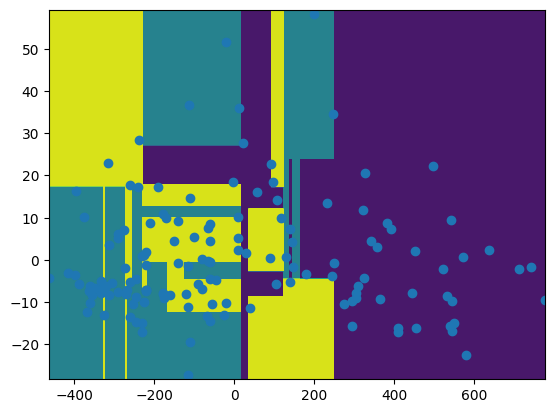

In [6]:
import matplotlib.pyplot as plt
x_min, x_max = train_pca[:, 0].min()-1, train_pca[:, 0].max()+1
y_min, y_max = train_pca[:, 1].min()-1, train_pca[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z)
plt.scatter(train_pca[:, 0], train_pca[:, 1])

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42,
                             oob_score=True)
rfc.fit(train_input, train_target)
print('랜덤 포레스트의 정확도 : ' + str(np.round(rfc.score(train_input, train_target), 2)))
print('랜덤 포레스트의 정확도 : ' + str(np.round(rfc.score(test_input, test_target), 2)))
print('OOB 정확도 : ' + str(np.round(rfc.oob_score_, 2)))

랜덤 포레스트의 정확도 : 1.0
랜덤 포레스트의 정확도 : 1.0
OOB 정확도 : 0.98
